# Applying K-means clustering and PCA on Call of Duty data

By Anna Sikora
28.03.2021

## Introduction

This project aims for creating a meaninfull clusters for the Call of Duty dataset. As the dataset has a lot of dimensions, the Principal Component Analyisis was used to improve the clustering performance.

PCA is a dimensionality reduction technique that allows for transforming a dataset to achieve less variables without loosing too much information needed. 

K-means clustering is a widely known unsupervised machine learning method, that generates clusters within the data that doesn't contain known or labeled outcomes.

Data used for the project comes from: https://www.kaggle.com/aishahakami/call-of-duty-players

In [11]:
#Importing neccessary libraries
import numpy as np
import pandas as pd
from sklearn.cluster import KMeans
from sklearn.datasets import make_blobs
from sklearn.metrics import silhouette_samples
import datetime
import matplotlib.pyplot as plt
import matplotlib as mpl
import seaborn as sns
from sklearn.cluster import KMeans 
from sklearn import metrics 
from scipy.spatial.distance import cdist 
import numpy as np 
import matplotlib.pyplot as plt
from sklearn.decomposition import PCA
from sklearn.metrics import silhouette_score
from sklearn.cluster import KMeans

# Preprocessing and EDA

In [12]:
df = pd.read_csv(r'path\cod.csv')

#display 10 top rows
df[:10]

,name,wins,kills,kdRatio,killstreak,level,losses,prestige,hits,timePlayed,headshots,averageTime,gamesPlayed,assists,misses,xp,scorePerMinute,shots,deaths
0,RggRt45#4697369,0,0,0.000000,0,1,0,0,0,0,0,0.000000,0,0,0,0,0.000000,0,0
1,JohniceRex#9176033,0,0,0.000000,0,1,0,110,0,7,0,7.000000,0,0,0,700,0.000000,0,16
2,bootybootykill#1892064,0,66,1.031250,0,9,0,110,0,32,16,32.000000,0,1,0,48300,0.000000,0,64
3,JNaCo#5244172,3,2,0.400000,0,1,0,0,0,3,0,3.000000,0,0,0,1150,0.000000,0,5
4,gomezyayo_007#6596687,0,2,0.200000,0,1,0,110,0,5,1,5.000000,0,0,0,1000,0.000000,0,10
5,Brxndoon7-LK#4002715,684,27011,1.066743,18,177,10,110,98332,1366,5113,2.323129,588,6063,305319,3932335,255.672035,403651,25321
6,bdooory_ab#7095171,4,162,0.632812,4,6,2,0,568,8,35,2.000000,4,68,4836,24485,265.500000,5404,256
7,ahevepluto#3505304,186,1898,0.569628,13,37,7,2,5111,550,485,3.666667,150,488,39978,458269,180.379636,45089,3332
8,MilkyLemonz-_-#5981249,741,21803,1.036658,26,185,29,111,81361,2442,3894,2.826389,864,4029,327230,4269370,198.844226,408591,21032
9,RPDUNKduo#8122914,26,349,0.444020,7,12,4,0,996,44,40,2.933333,15,138,4844,72765,253.677273,5840,786


In [13]:
list(df.columns.values)

['name',
 'wins',
 'kills',
 'kdRatio',
 'killstreak',
 'level',
 'losses',
 'prestige',
 'hits',
 'timePlayed',
 'headshots',
 'averageTime',
 'gamesPlayed',
 'assists',
 'misses',
 'xp',
 'scorePerMinute',
 'shots',
 'deaths']

In [14]:
df = df.drop(['name'], axis=1)

In [15]:
df = df.rename(columns = {'Annual Income (k$)': 'Annual Income','Spending Score (1-100)': 'Spending Score'})

In [16]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1558 entries, 0 to 1557
Data columns (total 18 columns):
 #   Column          Non-Null Count  Dtype  
---  ------          --------------  -----  
 0   wins            1558 non-null   int64  
 1   kills           1558 non-null   int64  
 2   kdRatio         1558 non-null   float64
 3   killstreak      1558 non-null   int64  
 4   level           1558 non-null   int64  
 5   losses          1558 non-null   int64  
 6   prestige        1558 non-null   int64  
 7   hits            1558 non-null   int64  
 8   timePlayed      1558 non-null   int64  
 9   headshots       1558 non-null   int64  
 10  averageTime     1558 non-null   float64
 11  gamesPlayed     1558 non-null   int64  
 12  assists         1558 non-null   int64  
 13  misses          1558 non-null   int64  
 14  xp              1558 non-null   int64  
 15  scorePerMinute  1558 non-null   float64
 16  shots           1558 non-null   int64  
 17  deaths          1558 non-null   i

In [17]:
# Null values
print(df.isnull().sum())

wins              0
kills             0
kdRatio           0
killstreak        0
level             0
losses            0
prestige          0
hits              0
timePlayed        0
headshots         0
averageTime       0
gamesPlayed       0
assists           0
misses            0
xp                0
scorePerMinute    0
shots             0
deaths            0
dtype: int64


In [18]:
df.describe()

,wins,kills,kdRatio,killstreak,level,losses,prestige,hits,timePlayed,headshots,averageTime,gamesPlayed,assists,misses,xp,scorePerMinute,shots,deaths
count,1558.000000,1558.000000,1558.000000,1558.000000,1558.000000,1558.000000,1558.000000,1558.000000,1558.000000,1558.000000,1558.000000,1558.000000,1558.000000,1558.000000,1.558000e+03,1558.000000,1.558000e+03,1558.000000
mean,153.002567,3753.001926,0.637098,6.895379,44.414634,4.998074,47.657253,10330.189987,425.915918,630.672657,21.428416,116.695764,685.797176,45356.671374,8.726335e+05,107.868825,5.568677e+04,3875.397946
std,301.984766,7929.696675,0.430459,10.184677,68.318064,7.005778,51.626213,22954.104384,786.182499,1305.150393,82.640000,256.354836,1518.383825,97919.428339,1.795755e+06,116.526676,1.202811e+05,7992.666443
min,0.000000,0.000000,0.000000,0.000000,1.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000e+00,0.000000,0.000000e+00,0.000000
25%,0.000000,4.000000,0.261442,0.000000,1.000000,0.000000,0.000000,0.000000,4.000000,1.000000,2.000000,0.000000,0.000000,0.000000,2.106250e+03,0.000000,0.000000e+00,14.000000
50%,10.000000,191.500000,0.732837,5.000000,11.000000,2.000000,14.000000,214.500000,51.000000,32.000000,3.031116,3.000000,36.500000,1307.500000,6.396800e+04,56.793995,1.565000e+03,269.000000
75%,168.000000,3445.750000,0.955293,12.000000,51.000000,8.000000,110.000000,9015.500000,485.500000,602.750000,9.085714,110.500000,609.750000,40906.750000,8.286690e+05,221.648976,5.078100e+04,3698.750000
max,3519.000000,66935.000000,3.000000,235.000000,435.000000,80.000000,117.000000,209851.000000,7479.000000,11719.000000,1349.000000,3745.000000,14531.000000,965775.000000,1.497054e+07,413.800000,1.166620e+06,67888.000000


<AxesSubplot:>

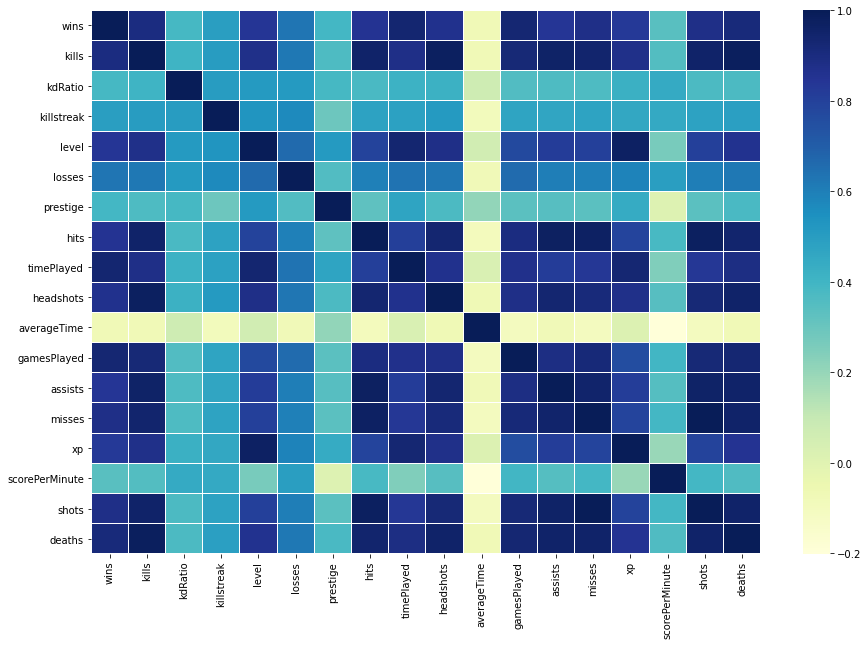

In [21]:
#Checking if there are correlations between variables
correlation_matrix = df.corr()

f, ax = plt.subplots(figsize = (15, 10))
sns.heatmap(correlation_matrix, ax=ax, cmap="YlGnBu", linewidths = 0.1)

Some of the variables are correlated, for example GamesPlayed and assists or misses and shots.

In [24]:
x=df['misses']
y=df['hits']

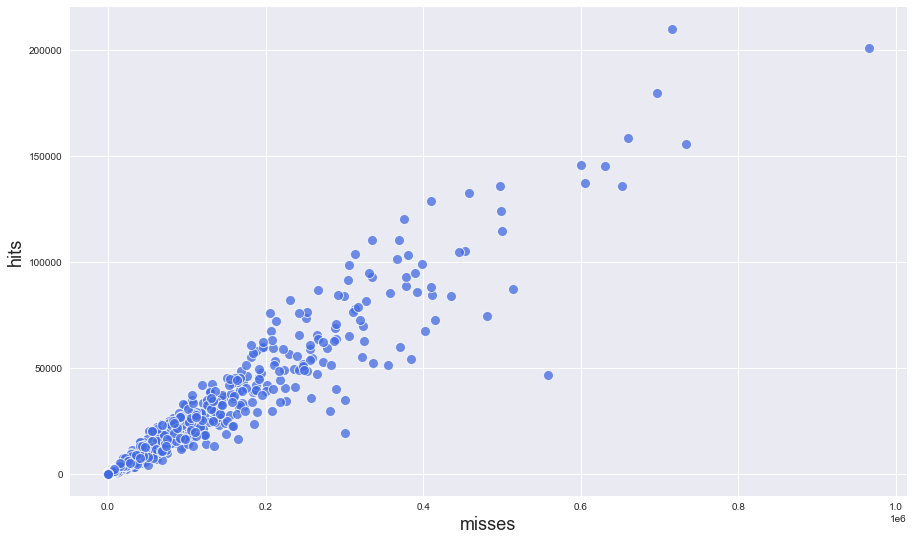

In [25]:
plt.figure(1, figsize=(15, 9))
plt.style.use('seaborn')
plt.scatter(x,y, s=100, c='royalblue', edgecolor='white', linewidth=1, alpha=0.75)
plt.xlabel('misses', fontsize=18)
plt.ylabel('hits',fontsize=18)
plt.show()

Scaling the data

In [26]:
X = df.iloc[:, 1:18]

In [27]:
X = np.array(X)

In [28]:
from sklearn import preprocessing

In [29]:
scaler = preprocessing.StandardScaler()
X = scaler.fit_transform(X)

## PCA

In [32]:
pca = PCA() 
pca.fit(X)
pca_data = pca.transform(X)

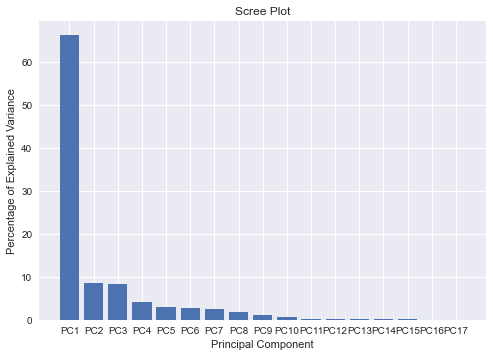

In [33]:
#Plotting to see how many components should we use
per_var = np.round(pca.explained_variance_ratio_* 100, decimals=1)
labels = ['PC' + str(x) for x in range(1, len(per_var)+1)]
 
plt.bar(x=range(1,len(per_var)+1), height=per_var, tick_label=labels)
plt.ylabel('Percentage of Explained Variance')
plt.xlabel('Principal Component')
plt.title('Scree Plot')
plt.show()

First two components account for the most variance.

In [47]:
#Plot for PC1 and PC2
pca_df = pd.DataFrame(pca_data, columns=labels)
pca_df.head()

,PC1,PC2,PC3,PC4,PC5,PC6,PC7,PC8,PC9,PC10,PC11,PC12,PC13,PC14,PC15,PC16,PC17
0,-2.238647,-0.983308,-1.153810,-0.105602,0.426197,0.260068,-0.180206,0.029040,-0.046421,-0.000579,-0.016957,-0.024484,-0.022114,-0.019688,-0.018082,0.008643,-1.278032e-07
1,-1.953349,-1.266016,0.027002,-0.971913,-0.833128,0.993248,-0.095418,-0.261174,-0.153460,-0.065647,-0.011205,-0.078429,-0.080666,0.048880,0.029647,0.003385,5.760317e-07
2,-1.544589,-0.434876,1.218054,-0.674550,-1.032296,-0.464798,0.706464,0.489793,0.158020,-0.099523,0.002373,0.018916,-0.028755,0.072416,0.054715,-0.030841,3.524044e-07
3,-2.098735,-0.627200,-0.745717,-0.042602,0.326122,-0.306009,0.140878,0.336304,0.081391,-0.018076,-0.007556,0.012586,0.001922,0.012078,0.006231,-0.006545,-5.454390e-08
4,-1.883942,-1.073695,0.207361,-0.971391,-0.888389,0.703381,0.067572,-0.106791,-0.091235,-0.074634,-0.006872,-0.060075,-0.070456,0.062621,0.041125,-0.004370,6.076026e-07


In [48]:
pca_data

array([[-2.23864675e+00, -9.83308084e-01, -1.15380990e+00, ...,
        -1.80823812e-02,  8.64305730e-03, -1.27803208e-07],
       [-1.95334936e+00, -1.26601649e+00,  2.70017673e-02, ...,
         2.96465295e-02,  3.38514397e-03,  5.76031702e-07],
       [-1.54458937e+00, -4.34875688e-01,  1.21805423e+00, ...,
         5.47148533e-02, -3.08410734e-02,  3.52404433e-07],
       ...,
       [-2.23864675e+00, -9.83308084e-01, -1.15380990e+00, ...,
        -1.80823812e-02,  8.64305730e-03, -1.27803208e-07],
       [-2.13977371e+00, -5.06483555e-01, -1.22001639e+00, ...,
        -8.93927322e-03,  1.93963499e-02, -1.80052183e-07],
       [-1.56399817e+00, -2.87117212e-01,  7.63056128e-01, ...,
         6.18217419e-02, -1.96869287e-02,  6.97033232e-07]])

In [49]:
scores_pca = pca.transform(pca_data)

In [50]:
#Keeping results in a dataframe
X = pd.DataFrame(scores_pca)

# Determining appropriate number of clusters

Elbow Method

C:\Users\sikor\anaconda3\lib\site-packages\sklearn\cluster\_kmeans.py:881: UserWarning: KMeans is known to have a memory leak on Windows with MKL, when there are less chunks than available threads. You can avoid it by setting the environment variable OMP_NUM_THREADS=7.
  warnings.warn(


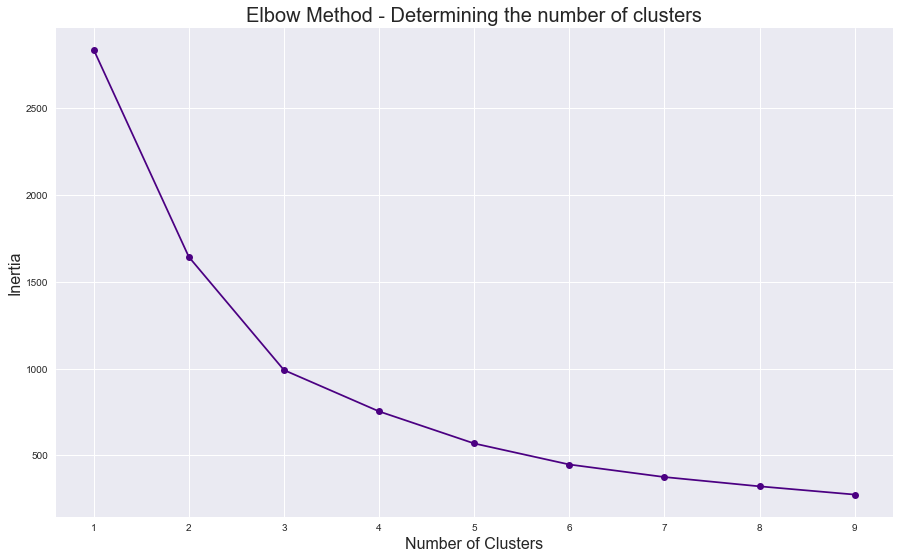

In [51]:
ks = range(1, 10)
inertias = []
for k in ks:
    # Create a KMeans instance with k clusters: model
    model = KMeans(n_clusters=k)
    
    # Fit model to samples
    model.fit(X.iloc[:,:2])
    
    # Append the inertia to the list of inertias
    inertias.append(model.inertia_)

plt.figure(figsize=(15, 9))
plt.plot(ks, inertias, '-o', color='indigo')
plt.xlabel('Number of Clusters', fontsize=16) 
plt.ylabel('Inertia', fontsize=16)
plt.title('Elbow Method - Determining the number of clusters', fontsize=20) 
plt.show() 


In [52]:
#Calculating Silhouette Coefficient
   
for k in range(2, 12):
    kmeans = KMeans(n_clusters=k).fit(X)
    label = kmeans.labels_
    silhouette_coeff = silhouette_score(X, label, metric='euclidean')
    print("Number of clusters={}, The Silhouette Coefficient={}".format(k, silhouette_coeff))

Number of clusters=2, The Silhouette Coefficient=0.6068832676415432
Number of clusters=3, The Silhouette Coefficient=0.4101259601616691
Number of clusters=4, The Silhouette Coefficient=0.33688930719548443
Number of clusters=5, The Silhouette Coefficient=0.35258303753418296
Number of clusters=6, The Silhouette Coefficient=0.34950198691030326
Number of clusters=7, The Silhouette Coefficient=0.39444808055503794
Number of clusters=8, The Silhouette Coefficient=0.3990598029932343
Number of clusters=9, The Silhouette Coefficient=0.3958541098456572
Number of clusters=10, The Silhouette Coefficient=0.4043741354446376
Number of clusters=11, The Silhouette Coefficient=0.39868258678531104


In [53]:
#Calculating Silhouette Score

for n_clusters in range(3,8):
    kmeans = KMeans(init='k-means++', n_clusters = n_clusters, n_init=30)
    kmeans.fit(X)
    clusters = kmeans.predict(X)
    silhouette_avg = silhouette_score(X, clusters)
    print("For n_clusters =", n_clusters, "The average silhouette_score is :", silhouette_avg)

For n_clusters = 3 The average silhouette_score is : 0.4101259601616691
For n_clusters = 4 The average silhouette_score is : 0.33688930719548443
For n_clusters = 5 The average silhouette_score is : 0.35249455272545765
For n_clusters = 6 The average silhouette_score is : 0.3501618752772369
For n_clusters = 7 The average silhouette_score is : 0.39423133611923644


From Silhouette Coefficient and Elbow method, we conclude that 4 clusters is reasonable for the K-means clustering algorithm.

# Applying K-Means Algorithm

In [54]:
kmeans = KMeans(n_clusters=4, max_iter=100, random_state=0)
KM_5_clusters = kmeans.fit(X)

In [55]:
kmeans.labels_

array([0, 0, 0, ..., 0, 0, 0])

In [56]:
kmeans.inertia_

9324.109738237086

In [57]:
centers = kmeans.cluster_centers_[:,1]

In [58]:
 kmeans.cluster_centers_

array([[-6.47943609e-01, -2.32557849e-01, -1.48414457e-01,
        -1.33236056e-01, -4.60876914e-02,  4.39784301e-01,
        -5.49786946e-01, -2.81424523e-01,  8.41304197e-02,
         7.04833630e-01,  2.91729320e-01, -3.48556451e-01,
         5.25428666e-01, -5.12004598e-01,  3.35847389e-01,
        -1.39654883e+00, -2.85551187e-03],
       [ 3.23901390e+00, -2.13588511e+00, -2.00033497e+00,
         4.37089788e-01, -4.35786391e-01, -2.69191621e-01,
        -6.58708173e-02, -6.49194501e-01, -1.26369087e+00,
        -4.06499411e+00, -1.61704084e+00,  1.56406086e+00,
        -2.93327783e+00,  3.20325913e+00, -2.66190801e+00,
         8.87546349e+00,  2.38996653e-02],
       [ 8.32786216e-02,  5.57638489e-01,  5.12563484e-01,
         7.87314341e-02,  4.56833702e-02, -6.59352505e-01,
         5.90936858e-01,  3.19862086e-01,  1.58205366e-01,
         1.09749562e-01,  4.60040964e-02,  1.93670015e-02,
        -2.78744689e-02, -1.99225706e-01,  3.72388907e-02,
        -3.26875438e-01,  1.0

In [59]:
kmeans.n_iter_

27

In [60]:
df['Classification'] = kmeans.labels_
df.head()

,wins,kills,kdRatio,killstreak,level,losses,prestige,hits,timePlayed,headshots,averageTime,gamesPlayed,assists,misses,xp,scorePerMinute,shots,deaths,Classification
0,0,0,0.00000,0,1,0,0,0,0,0,0.0,0,0,0,0,0.0,0,0,0
1,0,0,0.00000,0,1,0,110,0,7,0,7.0,0,0,0,700,0.0,0,16,0
2,0,66,1.03125,0,9,0,110,0,32,16,32.0,0,1,0,48300,0.0,0,64,0
3,3,2,0.40000,0,1,0,0,0,3,0,3.0,0,0,0,1150,0.0,0,5,0
4,0,2,0.20000,0,1,0,110,0,5,1,5.0,0,0,0,1000,0.0,0,10,0


In [61]:
df['Classification'].value_counts()

0    762
2    518
3    219
1     59
Name: Classification, dtype: int64

# Exploring results of the Classification

### By Components

In [62]:
df_segm = pd.concat([df.reset_index(drop=True), pd.DataFrame(scores_pca)], axis=1)
df_segm1 = df_segm.iloc[:, 0:21]
df_segm1.columns.values[-2:] = ["Component 1", "Component 2"]
df_segm1


,wins,kills,kdRatio,killstreak,level,losses,prestige,hits,timePlayed,headshots,...,gamesPlayed,assists,misses,xp,scorePerMinute,shots,deaths,Classification,Component 1,Component 2
0,0,0,0.000000,0,1,0,0,0,0,0,...,0,0,0,0,0.0,0,0,0,-0.981747,-0.556449
1,0,0,0.000000,0,1,0,110,0,7,0,...,0,0,0,700,0.0,0,16,0,-1.235377,-0.510249
2,0,66,1.031250,0,9,0,110,0,32,16,...,0,1,0,48300,0.0,0,64,0,-0.371408,0.190744
3,3,2,0.400000,0,1,0,0,0,3,0,...,0,0,0,1150,0.0,0,5,0,-0.657034,-0.290309
4,0,2,0.200000,0,1,0,110,0,5,1,...,0,0,0,1000,0.0,0,10,0,-1.086627,-0.378940
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
1553,0,51,0.432203,0,10,0,110,0,71,11,...,0,0,0,49935,0.0,0,118,0,-0.695119,-0.183162
1554,0,0,0.000000,0,1,0,0,0,0,0,...,0,0,0,0,0.0,0,0,0,-0.981747,-0.556449
1555,0,0,0.000000,0,1,0,0,0,0,0,...,0,0,0,0,0.0,0,0,0,-0.981747,-0.556449
1556,0,0,0.000000,0,1,0,0,2,1,0,...,0,1,7,0,91.2,9,0,0,-1.022568,-0.423517


C:\Users\sikor\anaconda3\lib\site-packages\seaborn\_decorators.py:36: FutureWarning: Pass the following variables as keyword args: x, y. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  warnings.warn(


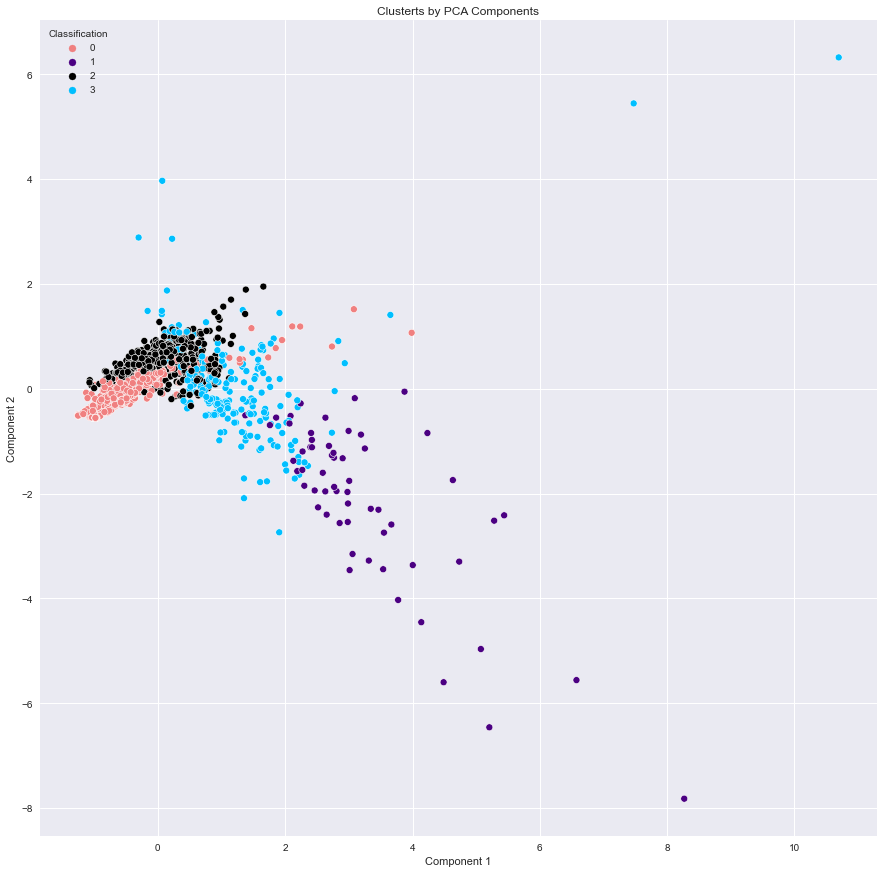

In [63]:
x_axis = df_segm1["Component 1"]
y_axis = df_segm1["Component 2"]

plt.figure(figsize=(15,15))
sns.scatterplot(x_axis, y_axis, hue = df_segm1["Classification"], palette = ['lightcoral','indigo','black','deepskyblue'])
plt.title("Clusterts by PCA Components")
plt.show()


### Exploration

On the charts above we can see how the clusters formed among the players data.

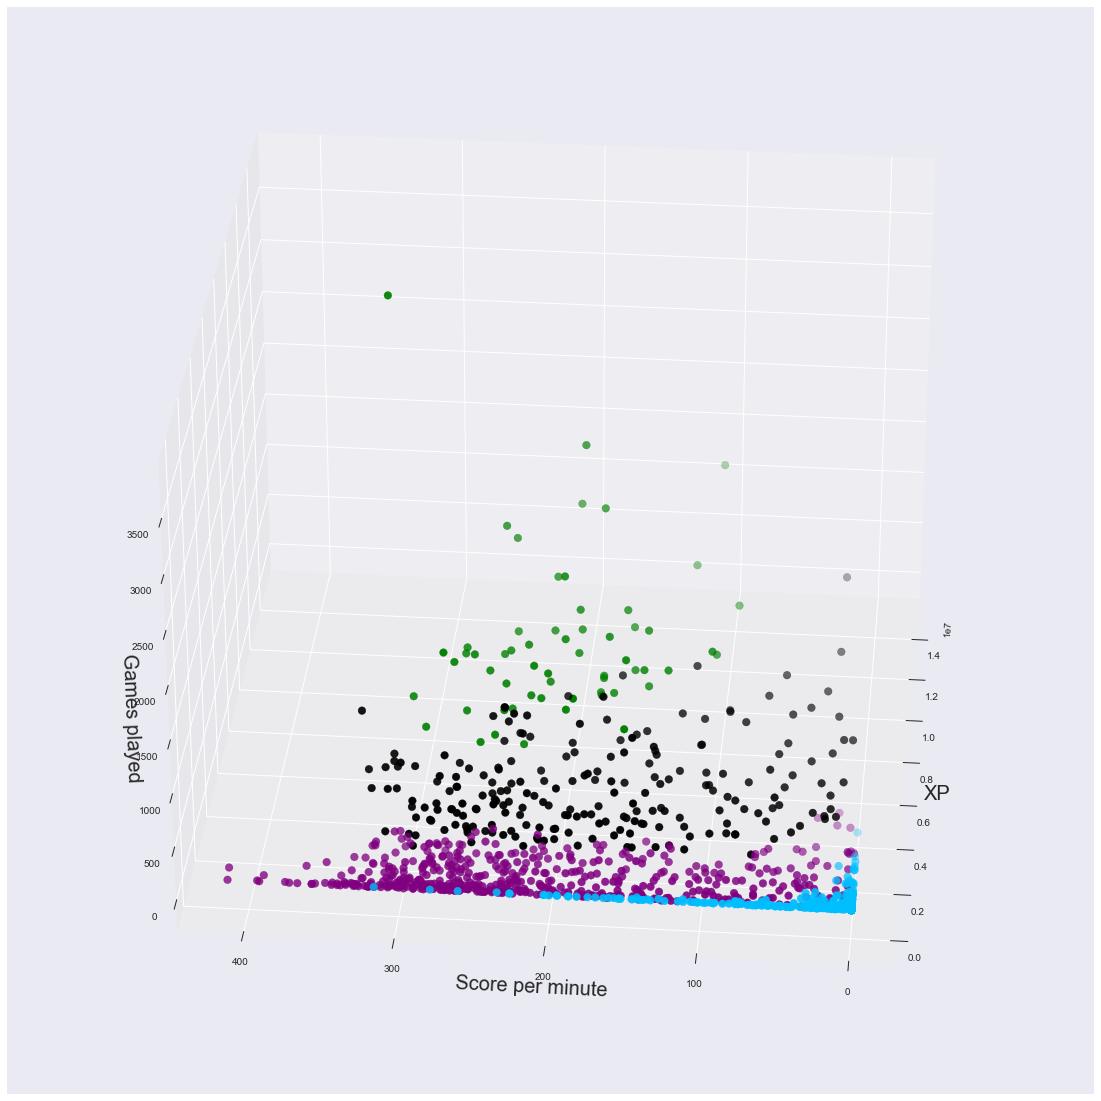

In [71]:
from mpl_toolkits.mplot3d import Axes3D
import matplotlib.pyplot as plt
import numpy as np
import pandas as pd
 
fig = plt.figure(figsize=(25,20))
ax = fig.add_subplot(111, projection='3d')
ax.scatter(df.xp[df.Classification == 0], df["scorePerMinute"][df.Classification == 0], df["gamesPlayed"][df.Classification == 0], c='deepskyblue', s=60)
ax.scatter(df.xp[df.Classification == 1], df["scorePerMinute"][df.Classification == 1], df["gamesPlayed"][df.Classification == 1], c='green', s=60)
ax.scatter(df.xp[df.Classification == 2], df["scorePerMinute"][df.Classification == 2], df["gamesPlayed"][df.Classification == 2], c='purple', s=60)
ax.scatter(df.xp[df.Classification == 3], df["scorePerMinute"][df.Classification == 3], df["gamesPlayed"][df.Classification == 3], c='black', s=60)
ax.view_init(30, 185)
plt.xlabel("XP", fontsize=20)
plt.ylabel("Score per minute", fontsize=20)
ax.set_zlabel('Games played', fontsize=20)
plt.show()

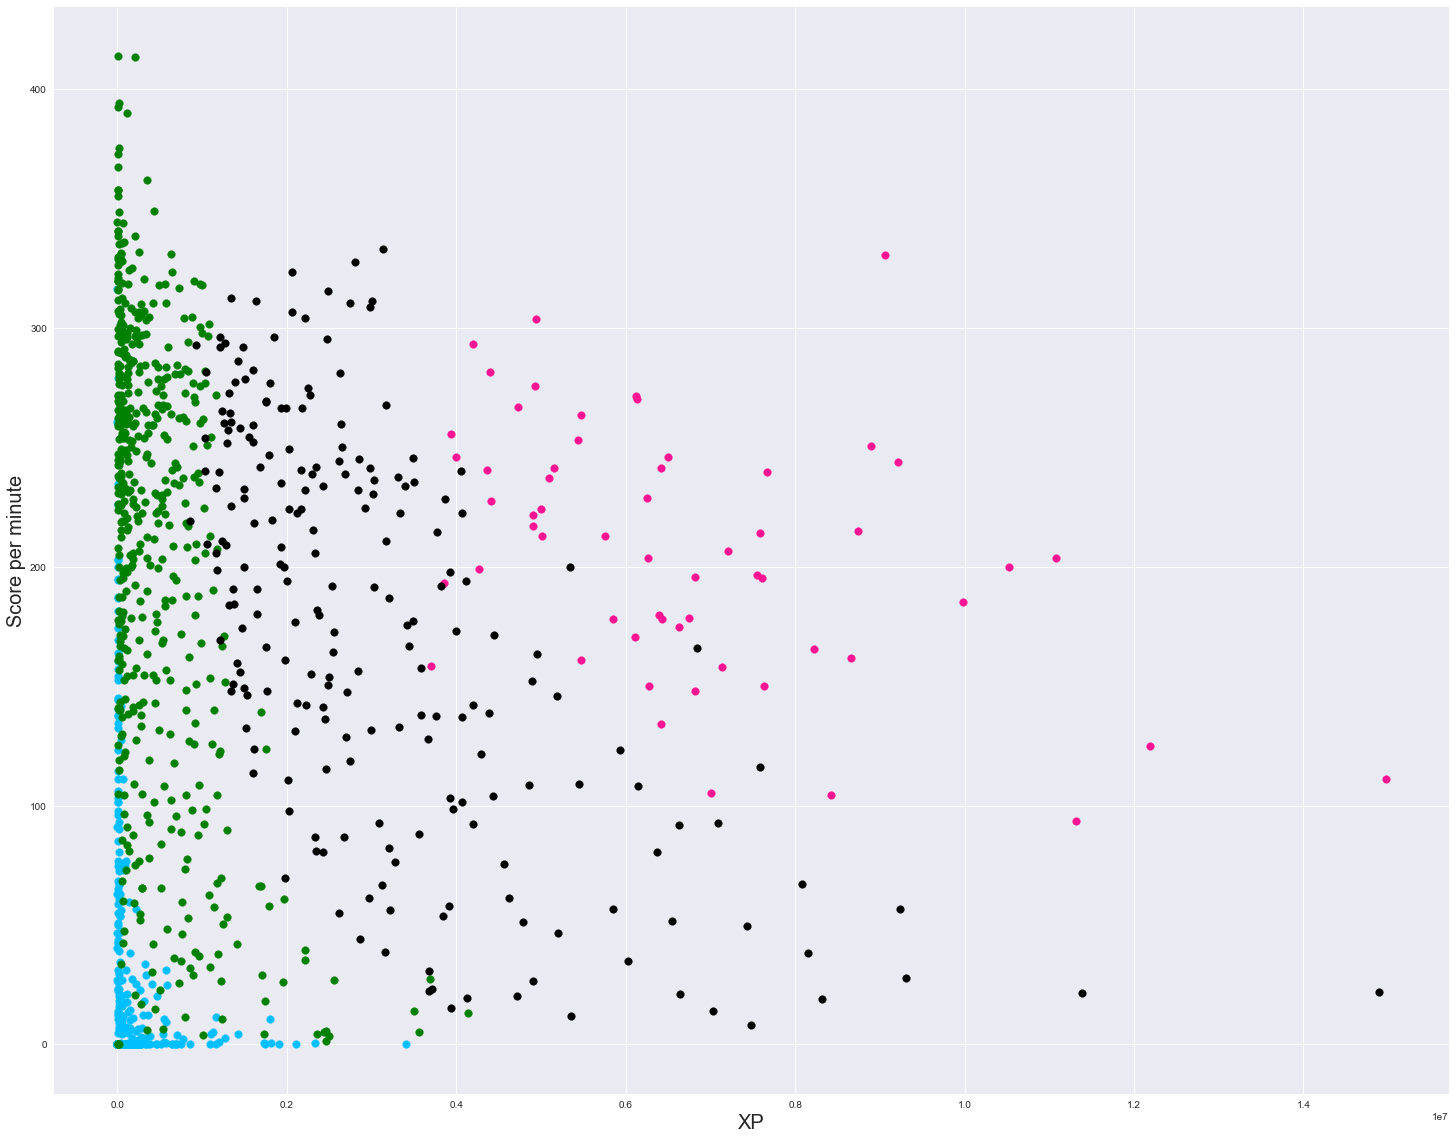

In [72]:
from mpl_toolkits.mplot3d import Axes3D
import matplotlib.pyplot as plt
import numpy as np
import pandas as pd
 
fig = plt.figure(figsize=(25,20))
plt.scatter(df.xp[df.Classification == 0], df["scorePerMinute"][df.Classification == 0], c='deepskyblue', s=60)
plt.scatter(df.xp[df.Classification == 1], df["scorePerMinute"][df.Classification == 1], c='deeppink', s=60)
plt.scatter(df.xp[df.Classification == 2], df["scorePerMinute"][df.Classification == 2], c='green', s=60)
plt.scatter(df.xp[df.Classification == 3], df["scorePerMinute"][df.Classification == 3], c='black', s=60)


plt.xlabel("XP", fontsize=20)
plt.ylabel("Score per minute", fontsize=20)
plt.show()

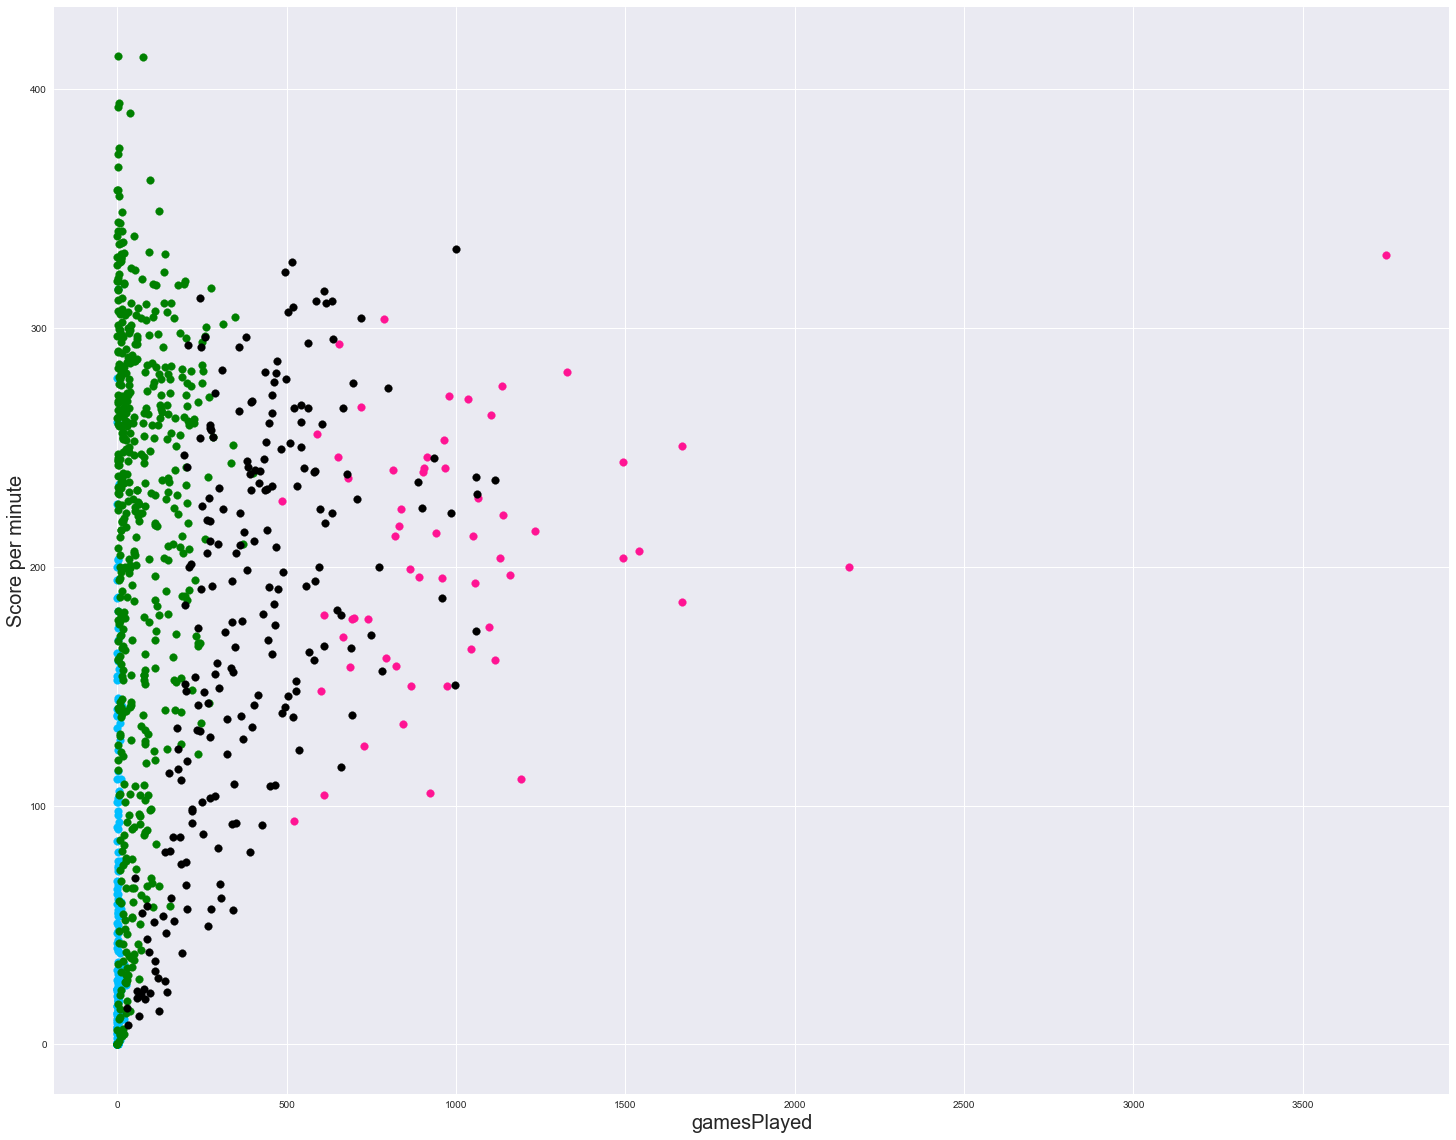

In [73]:
from mpl_toolkits.mplot3d import Axes3D
import matplotlib.pyplot as plt
import numpy as np
import pandas as pd
 
fig = plt.figure(figsize=(25,20))
plt.scatter(df.gamesPlayed[df.Classification == 0], df["scorePerMinute"][df.Classification == 0], c='deepskyblue', s=60)
plt.scatter(df.gamesPlayed[df.Classification == 1], df["scorePerMinute"][df.Classification == 1], c='deeppink', s=60)
plt.scatter(df.gamesPlayed[df.Classification == 2], df["scorePerMinute"][df.Classification == 2], c='green', s=60)
plt.scatter(df.gamesPlayed[df.Classification == 3], df["scorePerMinute"][df.Classification == 3], c='black', s=60)


plt.xlabel("gamesPlayed", fontsize=20)
plt.ylabel("Score per minute", fontsize=20)
plt.show()

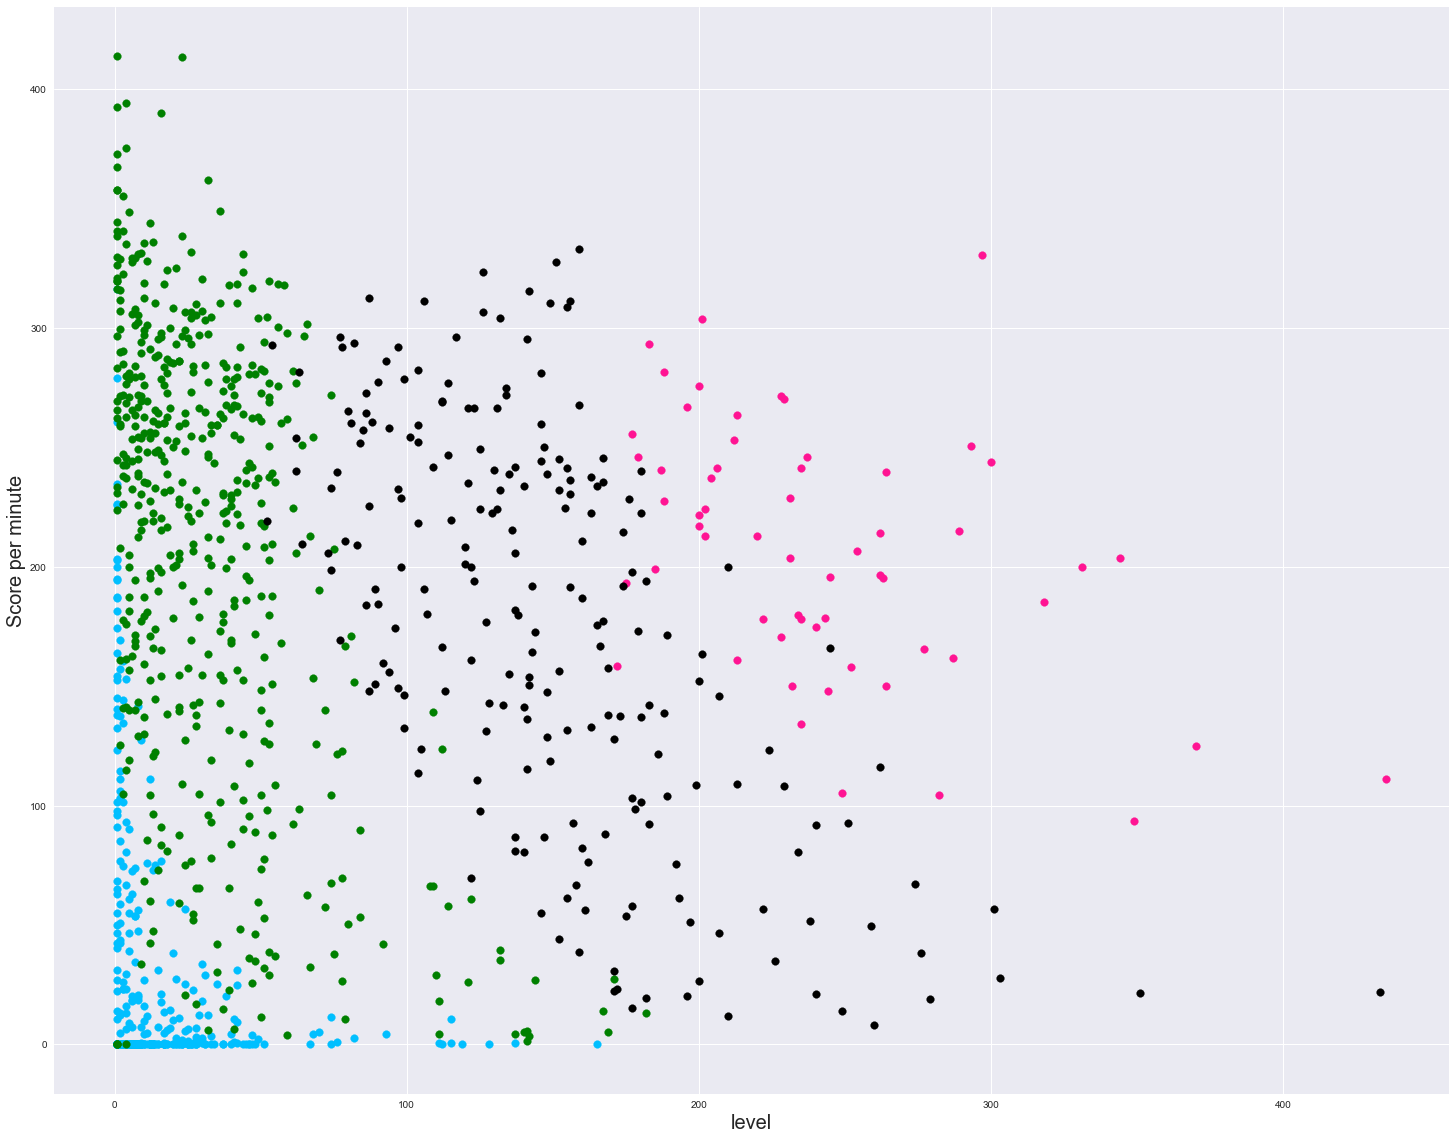

In [74]:
fig = plt.figure(figsize=(25,20))
plt.scatter(df.level[df.Classification == 0], df["scorePerMinute"][df.Classification == 0], c='deepskyblue', s=60)
plt.scatter(df.level[df.Classification == 1], df["scorePerMinute"][df.Classification == 1], c='deeppink', s=60)
plt.scatter(df.level[df.Classification == 2], df["scorePerMinute"][df.Classification == 2], c='green', s=60)
plt.scatter(df.level[df.Classification == 3], df["scorePerMinute"][df.Classification == 3], c='black', s=60)


plt.xlabel("level", fontsize=20)
plt.ylabel("Score per minute", fontsize=20)
plt.show()

<function matplotlib.pyplot.show(close=None, block=None)>

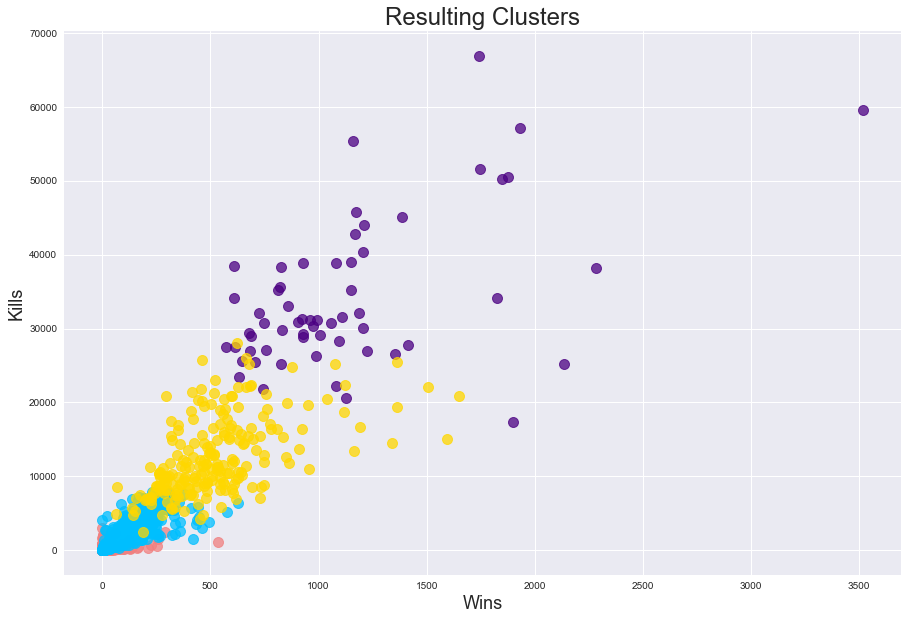

In [75]:
plt.figure(figsize=(15,10))
a="wins"
b="kills"
plt.scatter(df[a][df.Classification == 0], df[b][df.Classification == 0], s=100, c='lightcoral',linewidth=1, alpha=0.75)
plt.scatter(df[a][df.Classification == 1], df[b][df.Classification == 1], s=100, c='indigo',linewidth=1, alpha=0.75)
plt.scatter(df[a][df.Classification == 2], df[b][df.Classification == 2], s=100, c='deepskyblue',linewidth=1, alpha=0.75)
plt.scatter(df[a][df.Classification == 3], df[b][df.Classification == 3], s=100, c='gold',linewidth=1, alpha=0.75)



plt.title('Resulting Clusters', fontsize=24)
plt.xlabel('Wins', fontsize=18)
plt.ylabel('Kills', fontsize=18)
plt.show

<function matplotlib.pyplot.show(close=None, block=None)>

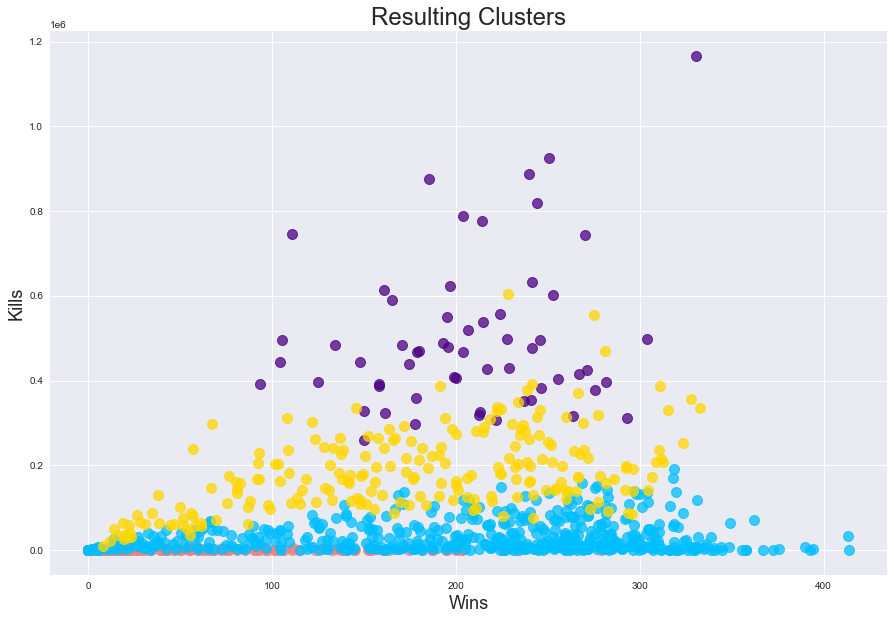

In [76]:
plt.figure(figsize=(15,10))
a="scorePerMinute"
b="shots"
plt.scatter(df[a][df.Classification == 0], df[b][df.Classification == 0], s=100, c='lightcoral',linewidth=1, alpha=0.75)
plt.scatter(df[a][df.Classification == 1], df[b][df.Classification == 1], s=100, c='indigo',linewidth=1, alpha=0.75)
plt.scatter(df[a][df.Classification == 2], df[b][df.Classification == 2], s=100, c='deepskyblue',linewidth=1, alpha=0.75)
plt.scatter(df[a][df.Classification == 3], df[b][df.Classification == 3], s=100, c='gold',linewidth=1, alpha=0.75)



plt.title('Resulting Clusters', fontsize=24)
plt.xlabel('Wins', fontsize=18)
plt.ylabel('Kills', fontsize=18)
plt.show

## Conclusion 

We aimed to cluster the data using K-means algorithm by limiting the amount of dimensions with the usage of Principal Component Analysis. We defined the optimal of clusters which is 4 clusters and visualised the results. Clusters are showing diffrent approached of players during the game.

Referces:  
-https://www.kaggle.com/datark1/customers-clustering-k-means-dbscan-and-ap


-https://www.kaggle.com/teamowu/k-means-for-customer-segmentation


-https://www.youtube.com/watch?v=4b5d3muPQmA&t=216s&ab_channel=StatQuestwithJoshStarmer


-https://www.youtube.com/watch?v=Lsue2gEM9D0&ab_channel=StatQuestwithJoshStarmer